# Classification on Iris dataset

For this classification problem, we use the well-known iris dataset and cover the following algorithms: kNN, Naive Bayes and Decision Tree.

## Setup

In [15]:
# Load common modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import DataConversionWarning

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

## Get the data

In [16]:
# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Load data
data = pd.read_csv("./data/iris.data", names=names)

In [17]:
# Print first five rows
data.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
# Split to response variables and target variable
X = np.array(data.drop("Class", axis=1))
y = np.array(data["Class"])

In [19]:
# Print number of instances and features
print("Number of instances: %d" % X.shape[0])
print("Number of features: %d" % X.shape[1])

# Count class labels
unique, counts = np.unique(y, return_counts=True)
print("Number of class labels:")
print(dict(zip(unique, counts)))

Number of instances: 150
Number of features: 4
Number of class labels:
{'Iris-setosa': 50, 'Iris-versicolor': 50, 'Iris-virginica': 50}


## Preprocessing

For preprocessing, we need to scale the features. Thus, we use standardization. After that, we split the data into a training and test sets.

In [20]:
# Feature scaling with standardization
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

In [21]:
# Split into train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Select and train models

As mentioned before, we try out kNN, Naive Bayes and Decision Tree. For the kNN classifier, we use our self implemented version while we use scikit-learn for the other two classifiers. We also vary the k value and try different distance metrics (Euclidean, Manhattan and Chebyshev). To evaluate different models and find the best paramaters for each algorithm, we use 5-fold cross validation and grid search.

In [53]:
# k Nearest Neighbor
from kNN import KNNClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [
    {"k": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], "metric": ["euclidean", "manhattan", "chebyshev"]}
]

classifier = KNNClassifier()
grid_search = GridSearchCV(classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("All results:")
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, ":", mean_score)

kNN_model = grid_search.best_estimator_

Best parameters:  {'k': 7, 'metric': 'manhattan'}
All results:
{'k': 1, 'metric': 'euclidean'} : 0.9416666666666667
{'k': 1, 'metric': 'manhattan'} : 0.925
{'k': 1, 'metric': 'chebyshev'} : 0.925
{'k': 2, 'metric': 'euclidean'} : 0.9416666666666667
{'k': 2, 'metric': 'manhattan'} : 0.925
{'k': 2, 'metric': 'chebyshev'} : 0.925
{'k': 3, 'metric': 'euclidean'} : 0.9416666666666667
{'k': 3, 'metric': 'manhattan'} : 0.9333333333333333
{'k': 3, 'metric': 'chebyshev'} : 0.9333333333333333
{'k': 4, 'metric': 'euclidean'} : 0.95
{'k': 4, 'metric': 'manhattan'} : 0.9333333333333333
{'k': 4, 'metric': 'chebyshev'} : 0.925
{'k': 5, 'metric': 'euclidean'} : 0.925
{'k': 5, 'metric': 'manhattan'} : 0.95
{'k': 5, 'metric': 'chebyshev'} : 0.925
{'k': 6, 'metric': 'euclidean'} : 0.9333333333333333
{'k': 6, 'metric': 'manhattan'} : 0.9416666666666667
{'k': 6, 'metric': 'chebyshev'} : 0.9333333333333333
{'k': 7, 'metric': 'euclidean'} : 0.9416666666666667
{'k': 7, 'metric': 'manhattan'} : 0.9583333333333

The Naive Bayes classifier has not important parameters. Therefore, we select the default settings.

In [33]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)
nb_model = classifier

In [59]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

param_grid = [
    {'max_depth': [1, 5, 10, 50, 100]}
]

tree_clf = DecisionTreeClassifier()
grid_search = GridSearchCV(tree_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("All results:")
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, ":", mean_score)

kNN_model = grid_search.best_estimator_

Best parameters:  {'max_depth': 100}
All results:
{'max_depth': 1} : 0.675
{'max_depth': 5} : 0.925
{'max_depth': 10} : 0.9333333333333333
{'max_depth': 50} : 0.9333333333333333
{'max_depth': 100} : 0.9416666666666667


## Evaluation on test set

============================== kNN ==============================
Classfication report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

      micro avg       1.00      1.00      1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Confusion matrix


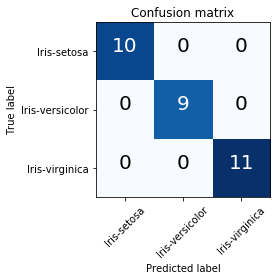

============================== Naive Bayes ==============================
Classfication report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

      micro avg       1.00      1.00      1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Confusion matrix


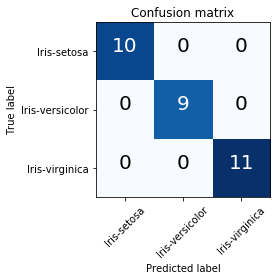

============================== Decision Tree ==============================
Classfication report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

      micro avg       1.00      1.00      1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Confusion matrix


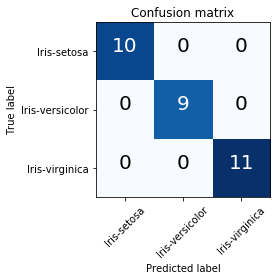

In [69]:
import itertools
from sklearn.metrics import classification_report, confusion_matrix

# Function to plot the confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", fontsize=20)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

    
class_names = np.unique(y_test)

models = {'kNN': kNN_model, 'Naive Bayes': nb_model, 'Decision Tree': tree_model}

for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # make predictions on test set
    
    # Print evaluation results
    print(f"============================== {name} ==============================")
    
    # Print classification report
    print("Classfication report")
    print(classification_report(y_test, y_pred, target_names=class_names))
    
    # Compute confusion matrix
    print("Confusion matrix")
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)

    # Plot confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')
    plt.show()

## Compare the performance with different k values for the kNN classifier
This is just to visualize how a higher k value affects the performance of the classification.

Text(0, 0.5, 'Accuracy')

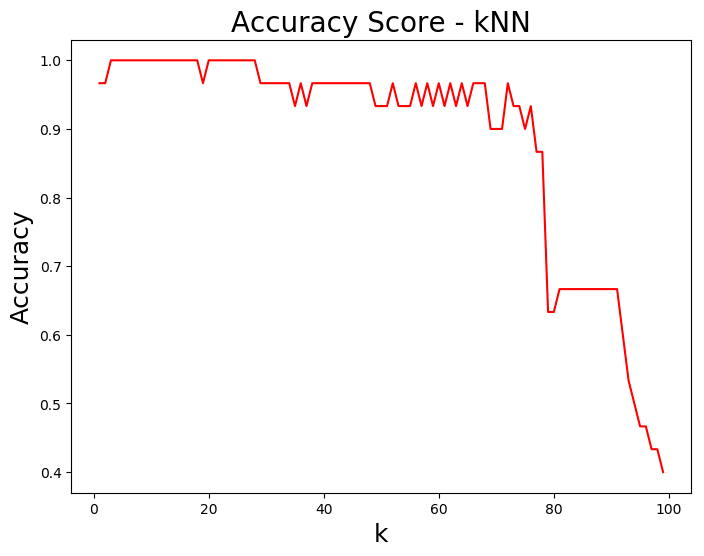

In [65]:
# Plot accuracy score for k values ranging from 1 to 100
from sklearn.metrics import accuracy_score

acc_score = []
for i in range(1, 100):  
    knn = KNNClassifier(k=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    acc_score.append(accuracy_score(y_test, pred_i))

plt.figure(figsize=(8, 6), dpi=100)  
plt.plot(range(1, 100), acc_score, color='red')
plt.title('Accuracy Score - kNN', fontsize=20)  
plt.xlabel('k', fontsize=18)  
plt.ylabel('Accuracy', fontsize=18)